In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import yfinance as yf
plt.style.use('fivethirtyeight')

In [2]:
df=yf.download('RELIANCE.NS',start="2016-11-01",end="2021-11-01",interval='1d')
df=df.reset_index()
df=df.drop(['High','Low','Close','Adj Close','Volume'],axis=1)
df

[*********************100%***********************]  1 of 1 completed


,Date,Open
0,2016-11-01,520.714172
1,2016-11-02,515.612488
2,2016-11-03,507.118042
3,2016-11-04,505.334930
4,2016-11-07,502.239258
...,...,...
1229,2021-10-25,2680.000000
1230,2021-10-26,2617.100098
1231,2021-10-27,2652.000000
1232,2021-10-28,2620.000000


In [3]:
df.columns=['ds','y']

In [4]:
df

,ds,y
0,2016-11-01,520.714172
1,2016-11-02,515.612488
2,2016-11-03,507.118042
3,2016-11-04,505.334930
4,2016-11-07,502.239258
...,...,...
1229,2021-10-25,2680.000000
1230,2021-10-26,2617.100098
1231,2021-10-27,2652.000000
1232,2021-10-28,2620.000000


In [5]:
import pandas as pd

In [6]:
df['ds']=pd.to_datetime(df['ds'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1234 non-null   datetime64[ns]
 1   y       1234 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.4 KB


In [8]:
from fbprophet import Prophet
model=Prophet(daily_seasonality=True)
model.fit(df)


In [9]:
future=model.make_future_dataframe(periods=365,freq='D')

In [10]:
forecast=model.predict(future)

In [11]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-11-01,508.250156,388.368671,678.921762,508.250156,508.250156,16.487513,16.487513,16.487513,-43.176448,...,-1.236406,-1.236406,-1.236406,60.900367,60.900367,60.900367,0.0,0.0,0.0,524.737669
1,2016-11-02,509.536357,373.370788,658.237506,509.536357,509.536357,9.563391,9.563391,9.563391,-43.176448,...,-2.889099,-2.889099,-2.889099,55.628938,55.628938,55.628938,0.0,0.0,0.0,519.099749
2,2016-11-03,510.822559,383.821625,652.997972,510.822559,510.822559,6.775670,6.775670,6.775670,-43.176448,...,-0.641537,-0.641537,-0.641537,50.593655,50.593655,50.593655,0.0,0.0,0.0,517.598229
3,2016-11-04,512.108761,373.175034,648.403584,512.108761,512.108761,-2.838148,-2.838148,-2.838148,-43.176448,...,-5.497017,-5.497017,-5.497017,45.835316,45.835316,45.835316,0.0,0.0,0.0,509.270613
4,2016-11-07,515.967366,370.443958,649.564937,515.967366,515.967366,-10.141098,-10.141098,-10.141098,-43.176448,...,-0.530053,-0.530053,-0.530053,33.565402,33.565402,33.565402,0.0,0.0,0.0,505.826268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,2022-10-25,2618.354547,2417.524752,2952.658303,2406.311028,2863.319224,58.660354,58.660354,58.660354,-43.176448,...,-1.236406,-1.236406,-1.236406,103.073207,103.073207,103.073207,0.0,0.0,0.0,2677.014901
1595,2022-10-26,2619.136508,2415.550683,2966.269497,2406.454712,2865.069253,51.539077,51.539077,51.539077,-43.176448,...,-2.889099,-2.889099,-2.889099,97.604624,97.604624,97.604624,0.0,0.0,0.0,2670.675585
1596,2022-10-27,2619.918469,2418.770648,2961.846594,2406.375363,2866.923131,48.172947,48.172947,48.172947,-43.176448,...,-0.641537,-0.641537,-0.641537,91.990932,91.990932,91.990932,0.0,0.0,0.0,2668.091416
1597,2022-10-28,2620.700429,2398.318128,2941.903183,2406.129718,2868.692840,37.611774,37.611774,37.611774,-43.176448,...,-5.497017,-5.497017,-5.497017,86.285238,86.285238,86.285238,0.0,0.0,0.0,2658.312203


In [12]:
forecast[['trend','yhat_lower','yhat_upper','yhat']]

,trend,yhat_lower,yhat_upper,yhat
0,508.250156,388.368671,678.921762,524.737669
1,509.536357,373.370788,658.237506,519.099749
2,510.822559,383.821625,652.997972,517.598229
3,512.108761,373.175034,648.403584,509.270613
4,515.967366,370.443958,649.564937,505.826268
...,...,...,...,...
1594,2618.354547,2417.524752,2952.658303,2677.014901
1595,2619.136508,2415.550683,2966.269497,2670.675585
1596,2619.918469,2418.770648,2961.846594,2668.091416
1597,2620.700429,2398.318128,2941.903183,2658.312203


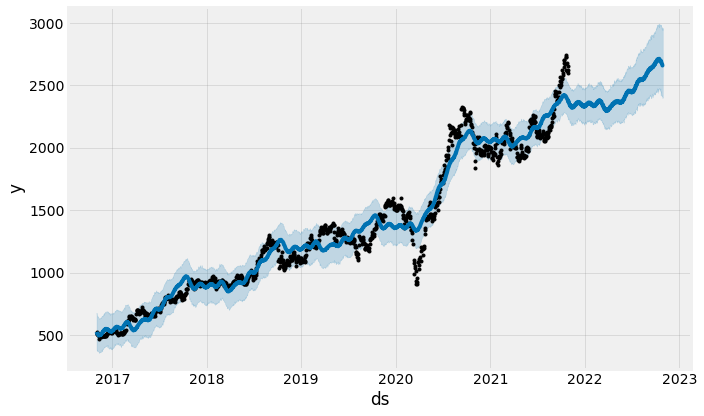

In [13]:
model.plot(forecast);

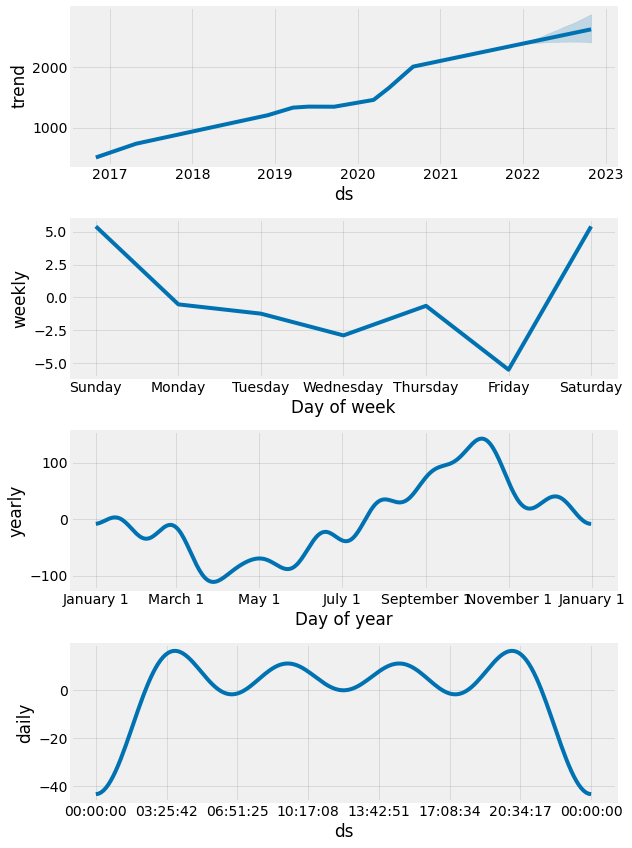

In [14]:
model.plot_components(forecast);